# Площадь под графиком и управление порогом


# Содержание работы

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
from sklearn.datasets import make_classification


X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

In [35]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)

In [36]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression().fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)
y_pred_proba

array([[4.02731514e-03, 9.95972685e-01],
       [2.00515726e-03, 9.97994843e-01],
       [9.94701169e-01, 5.29883066e-03],
       [8.47625806e-01, 1.52374194e-01],
       [1.66665036e-03, 9.98333350e-01],
       [4.99938552e-01, 5.00061448e-01],
       [9.80236861e-01, 1.97631392e-02],
       [9.76536616e-01, 2.34633843e-02],
       [1.79993032e-02, 9.82000697e-01],
       [2.93534820e-01, 7.06465180e-01],
       [9.95837980e-01, 4.16201961e-03],
       [2.53553400e-01, 7.46446600e-01],
       [9.92334325e-01, 7.66567488e-03],
       [3.80412811e-02, 9.61958719e-01],
       [6.47854323e-02, 9.35214568e-01],
       [1.92346446e-01, 8.07653554e-01],
       [8.55196114e-01, 1.44803886e-01],
       [4.34676792e-02, 9.56532321e-01],
       [8.43042493e-01, 1.56957507e-01],
       [5.50912415e-02, 9.44908759e-01],
       [1.32992380e-01, 8.67007620e-01],
       [5.89717936e-01, 4.10282064e-01],
       [9.79518433e-01, 2.04815673e-02],
       [3.32906248e-01, 6.67093752e-01],
       [9.957366

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

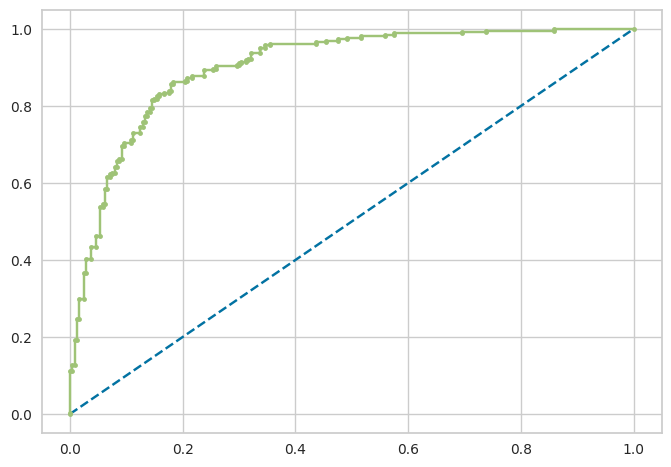

In [37]:
from sklearn.metrics import roc_curve


fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [38]:
from sklearn.metrics import roc_auc_score


roc_auc_score(y_test, y_pred_proba[:, 1])

0.9028205128205128

In [39]:
from sklearn.metrics import precision_recall_curve


precision, recall, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

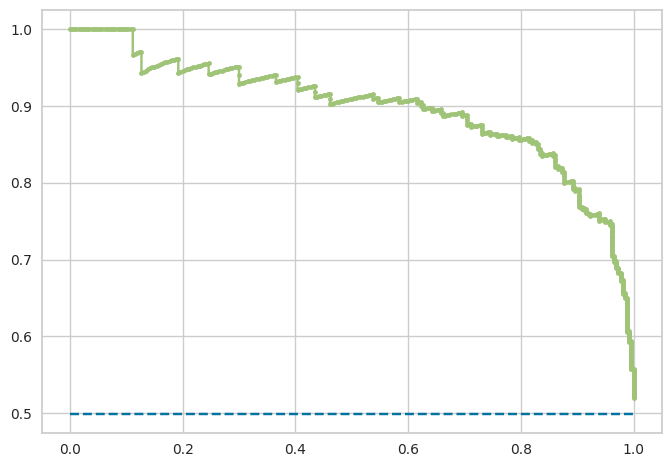

In [40]:
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.show()

In [41]:
from sklearn.metrics import auc


auc(recall, precision)

0.8977244980325834

In [42]:
from sklearn.metrics import classification_report


y_test_pred = model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       240
           1       0.84      0.85      0.84       260

    accuracy                           0.83       500
   macro avg       0.83      0.83      0.83       500
weighted avg       0.83      0.83      0.83       500



findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

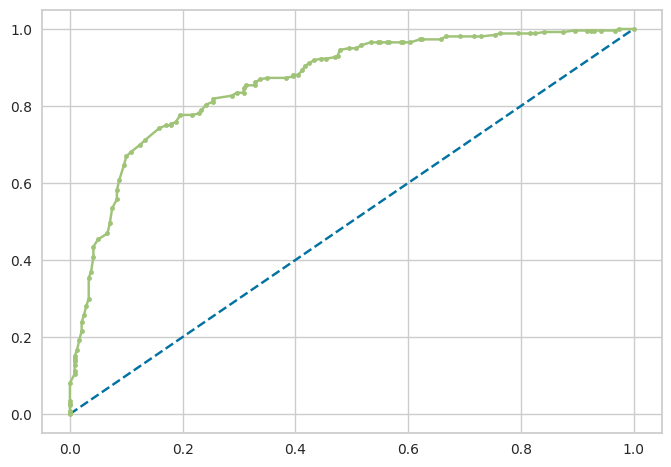

In [43]:
from sklearn.neighbors import KNeighborsClassifier


model2 = KNeighborsClassifier(n_neighbors=250).fit(X_train, y_train)
y_pred2_proba = model2.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred2_proba[:, 1])

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [44]:
roc_auc_score(y_test, y_pred2_proba[:, 1])

0.8630608974358974

In [45]:
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99, 0.01], random_state=1)


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=4)

print('Датасет: Class0=%d, Class1=%d' % (len(y[y==0]), len(y[y==1])))
print('Обучающая: Class0=%d, Class1=%d' % (len(y_train[y_train==0]), len(y_train[y_train==1])))
print('Тестовая: Class0=%d, Class1=%d' % (len(y_test[y_test==0]), len(y_test[y_test==1])))

Датасет: Class0=985, Class1=15
Обучающая: Class0=490, Class1=10
Тестовая: Class0=495, Class1=5


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)

print('Датасет: Class0=%d, Class1=%d' % (len(y[y==0]), len(y[y==1])))
print('Обучающая: Class0=%d, Class1=%d' % (len(y_train[y_train==0]), len(y_train[y_train==1])))
print('Тестовая: Class0=%d, Class1=%d' % (len(y_test[y_test==0]), len(y_test[y_test==1])))

Датасет: Class0=985, Class1=15
Обучающая: Class0=492, Class1=8
Тестовая: Class0=493, Class1=7


In [48]:
model = LogisticRegression().fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

y_test_pred = model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       493
           1       0.00      0.00      0.00         7

    accuracy                           0.98       500
   macro avg       0.49      0.50      0.49       500
weighted avg       0.97      0.98      0.98       500



findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

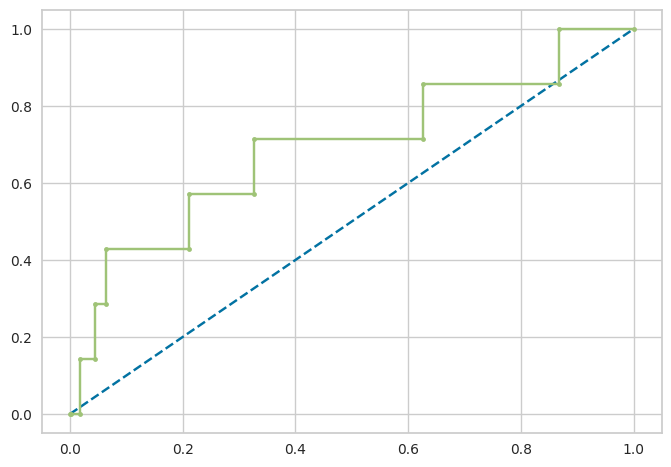

In [49]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

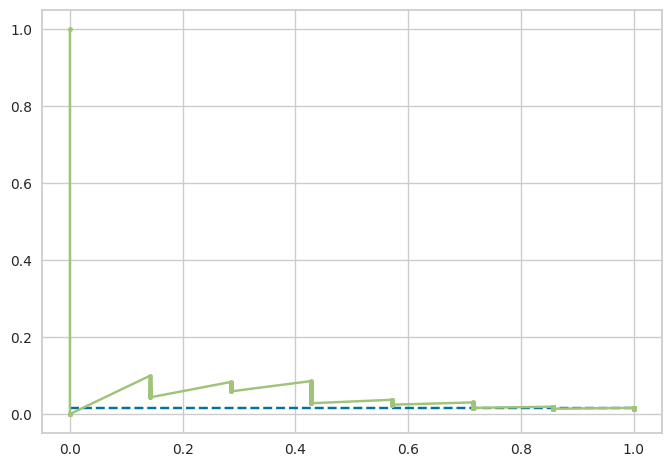

In [50]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.show()

In [51]:
X, y = make_classification(n_samples=10000, n_classes=2, weights=[0.99, 0.01], random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)

model = LogisticRegression().fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

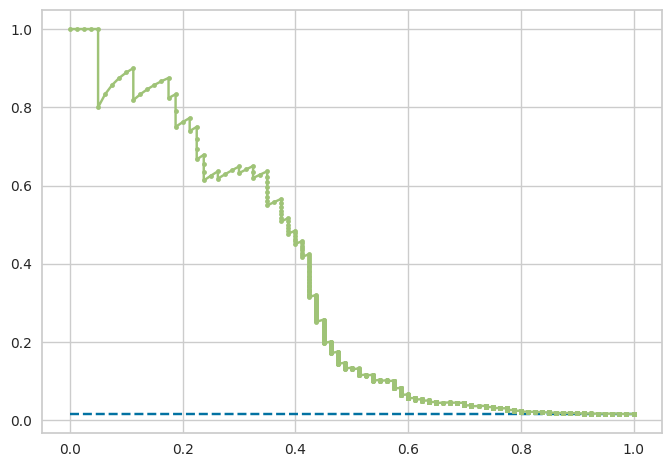

In [52]:
p, r, pr_thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(r, p, marker='.')
plt.show()

In [53]:
from numpy import argmax

f1 = (2 * p * r) / (p + r)
ix = argmax(f1)
pr_thresholds[ix]

print('Порог=%f, F-Score=%.3f' % (pr_thresholds[ix], f1[ix]))

Порог=0.236250, F-Score=0.452


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

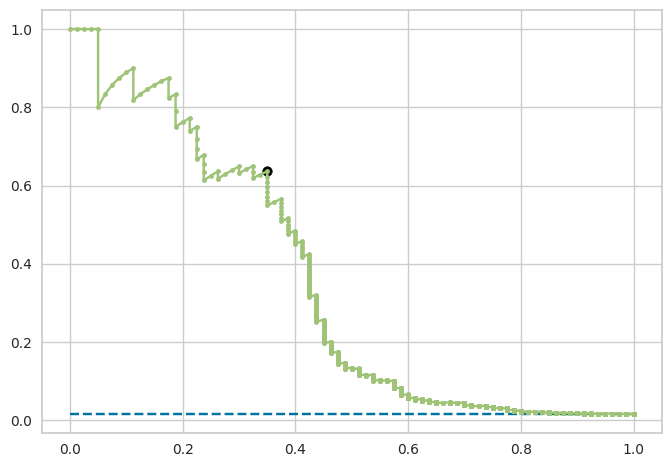

In [54]:
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(r, p, marker='.')
plt.scatter(r[ix], p[ix], marker='o', color='black')
plt.show()

In [55]:
y_pred = (y_pred_proba[:, 1] > pr_thresholds[ix]).astype('int')
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4920
           1       0.63      0.34      0.44        80

    accuracy                           0.99      5000
   macro avg       0.81      0.67      0.72      5000
weighted avg       0.98      0.99      0.98      5000



In [56]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4920
           1       0.85      0.14      0.24        80

    accuracy                           0.99      5000
   macro avg       0.92      0.57      0.61      5000
weighted avg       0.98      0.99      0.98      5000



# Задания для самостоятельной работы

### 1. Повторите анализ из лабораторной работы, но с двумерными датасетами. Изобразите графически, как изменение порога влияет на расположение границы принятия решений.

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

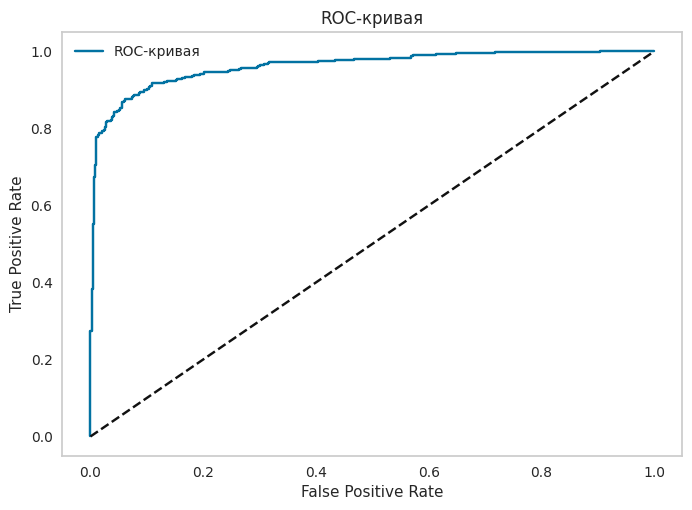

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

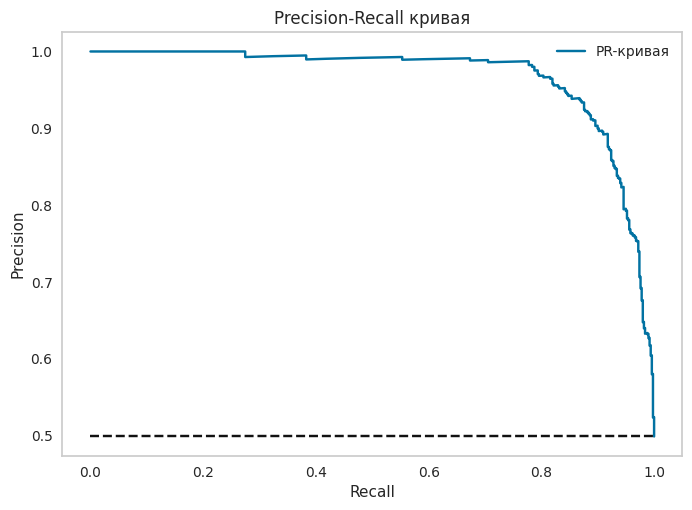

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

Classification Report (порог 0.3):
              precision    recall  f1-score   support

           0       0.92      0.83      0.88       501
           1       0.85      0.93      0.89       499

    accuracy                           0.88      1000
   macro avg       0.89      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000

Classification Report (порог 0.5):
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       501
           1       0.92      0.88      0.90       499

    accuracy                           0.90      1000
   macro avg       0.90      0.90      0.90      1000
weighted avg       0.90      0.90      0.90      1000

Classification Report (порог 0.7):
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       501
           1       0.97      0.81      0.88       499

    accuracy                           0.89      1000
   macro avg       0.90

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

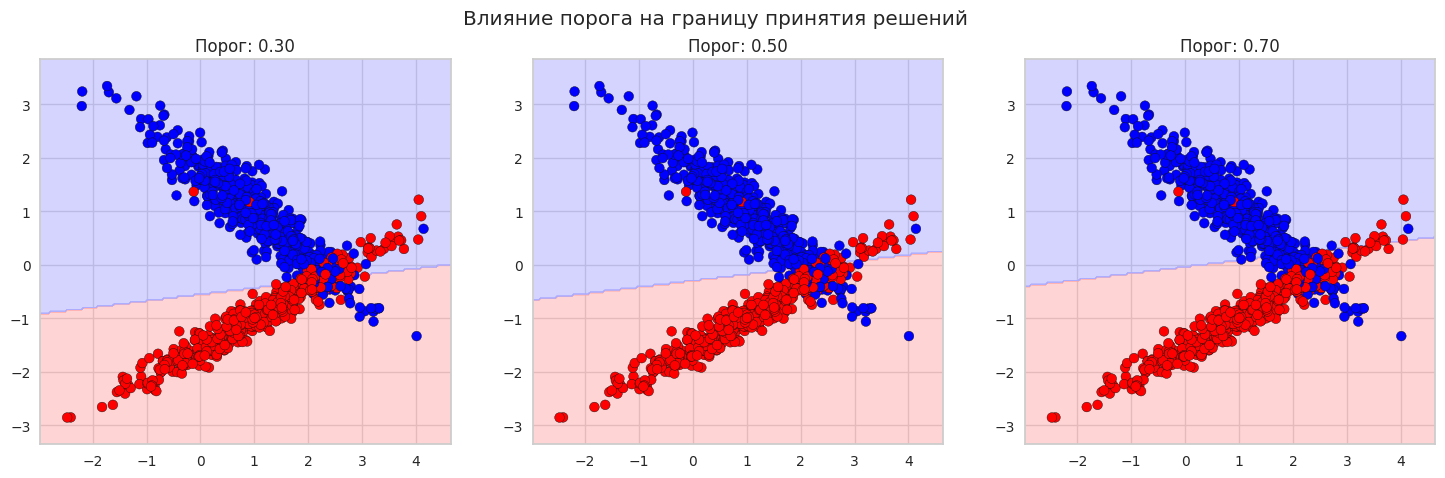

In [57]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, precision_recall_curve, classification_report
from matplotlib.colors import ListedColormap


X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0,
                           n_informative=2, n_clusters_per_class=1, random_state=42)


model = LogisticRegression()
model.fit(X, y)
y_score = model.predict_proba(X)[:, 1]


fpr, tpr, roc_thresholds = roc_curve(y, y_score)
plt.plot(fpr, tpr, label="ROC-кривая")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая")
plt.grid()
plt.legend()
plt.show()


precision, recall, pr_thresholds = precision_recall_curve(y, y_score)
no_skill = len(y[y==1]) / len(y)
plt.plot(recall, precision, label="PR-кривая")
plt.plot([0, 1], [no_skill, no_skill], 'k--')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall кривая")
plt.grid()
plt.legend()
plt.show()


def plot_decision_boundary(model, X, y, threshold, ax):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = (Z > threshold).astype(int)
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']), alpha=0.5)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['red', 'blue']), edgecolor='k')
    ax.set_title(f'Порог: {threshold:.2f}')


fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, t in zip(axes, [0.3, 0.5, 0.7]):
    plot_decision_boundary(model, X, y, threshold=t, ax=ax)
    y_pred_custom = (y_score > t).astype(int)
    print(f"Classification Report (порог {t}):")
    print(classification_report(y, y_pred_custom))
    
plt.suptitle("Влияние порога на границу принятия решений")
plt.show()


### 2. Повторите анализ на реальном датасете для бинарной классификации. Проинтерпретируйте результат, сделайте вывод.

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

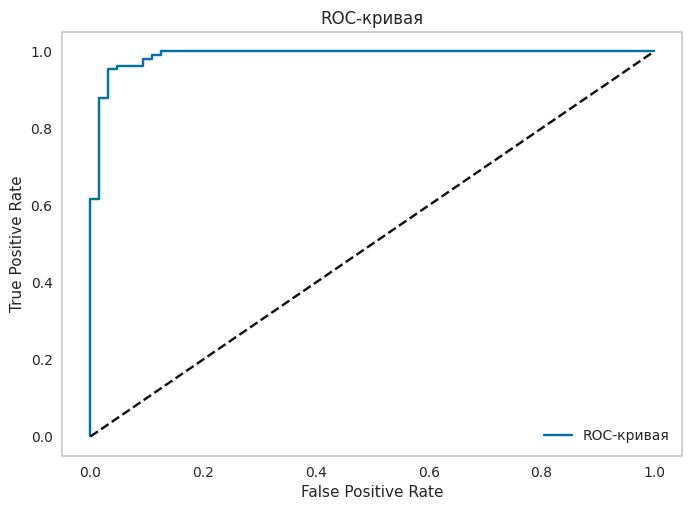

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

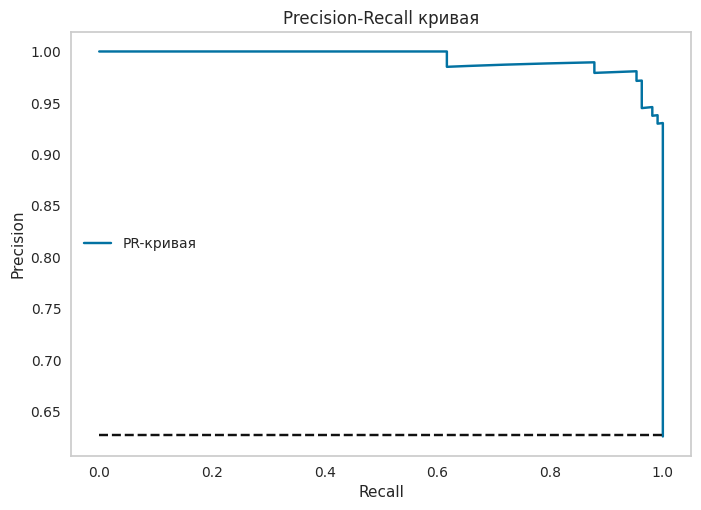

In [58]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, precision_recall_curve, classification_report


data = load_breast_cancer()
X = data.data
y = data.target 


X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)


model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)


y_pred_proba = model.predict_proba(X_test)[:, 1]


fpr, tpr, roc_thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="ROC-кривая")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая")
plt.grid()
plt.legend()
plt.show()


precision, recall, pr_thresholds = precision_recall_curve(y_test, y_pred_proba)
no_skill = len(y[y==1]) / len(y)
plt.plot(recall, precision, label="PR-кривая")
plt.plot([0, 1], [no_skill, no_skill], 'k--')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall кривая")
plt.grid()
plt.legend()
plt.show()

In [59]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93        64
           1       0.94      0.98      0.96       107

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



Модель показывает отличные метрики и хорошо справляется с классификацией

### 3. В задании по оптимизации порога используйте ROC и среднее геометрическое между TPR и FPR как критерий оптимизации.

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

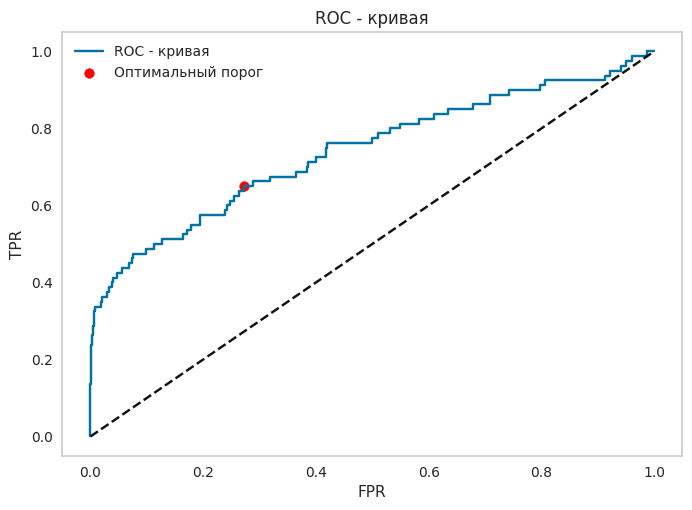

Оптимальный порог: 0.01
              precision    recall  f1-score   support

           0       0.99      0.73      0.84      4920
           1       0.04      0.64      0.07        80

    accuracy                           0.73      5000
   macro avg       0.51      0.68      0.45      5000
weighted avg       0.98      0.73      0.83      5000



In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, classification_report


X, y = make_classification(n_samples=10000, n_classes=2, weights=[0.99, 0.01], random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

y_proba = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)

geo_score = np.sqrt(tpr * (1 - fpr))


ix = np.argmax(geo_score)
optimal_threshold = thresholds[ix]


plt.plot(fpr, tpr, label='ROC - кривая')
plt.plot([0, 1], [0, 1], 'k--')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='red', label='Оптимальный порог')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC - кривая')
plt.legend()
plt.grid()
plt.show()


y_pred = (y_proba > optimal_threshold).astype(int)
print(f"Оптимальный порог: {optimal_threshold:.2f}")
print(classification_report(y_test, y_pred))


### 4. При оптимизации порога по PR-кривой используйте другую F-метрику - сначала с преимуществом precision, а затем - с превалированием recall. Изобразите получившиеся пороги на графике. Проанализируйте метрики получившихся моделей.

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

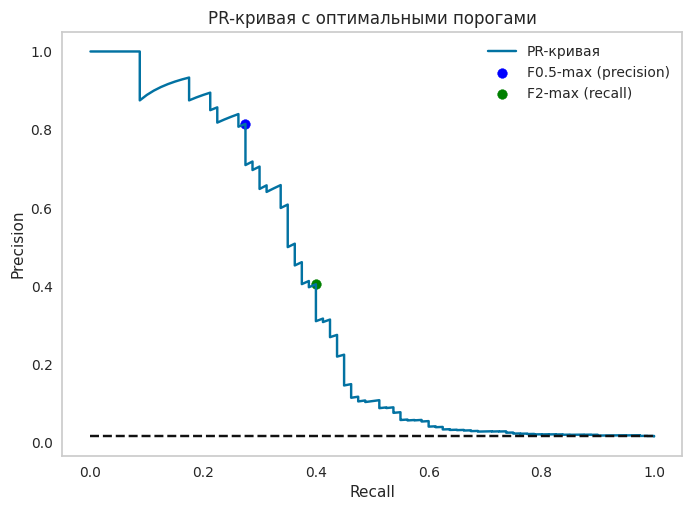

Порог с приоритетом Precision (F0.5): 0.2876
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4920
           1       0.81      0.26      0.40        80

    accuracy                           0.99      5000
   macro avg       0.90      0.63      0.69      5000
weighted avg       0.99      0.99      0.98      5000

Порог с приоритетом Recall (F2): 0.1156
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4920
           1       0.40      0.39      0.39        80

    accuracy                           0.98      5000
   macro avg       0.69      0.69      0.69      5000
weighted avg       0.98      0.98      0.98      5000



In [61]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, precision_recall_curve
)
import numpy as np
import matplotlib.pyplot as plt


X, y = make_classification(n_samples=10000, n_classes=2, weights=[0.99, 0.01], random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)


model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)


y_proba = model.predict_proba(X_test)[:, 1]


precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

# F0.5 делает акцент на precision
beta_low = 0.5
f_beta_precision = (1 + beta_low**2) * (precision * recall) / (beta_low**2 * precision + recall + 1e-9)

# F2 делает акцент на recall
beta_high = 2
f_beta_recall = (1 + beta_high**2) * (precision * recall) / (beta_high**2 * precision + recall + 1e-9)


ix_prec = np.argmax(f_beta_precision)
ix_recall = np.argmax(f_beta_recall)
threshold_prec = thresholds[ix_prec]
threshold_recall = thresholds[ix_recall]


no_skill = len(y[y==1]) / len(y)
plt.plot(recall, precision, label="PR-кривая")
plt.plot([0, 1], [no_skill, no_skill], 'k--')
plt.scatter(recall[ix_prec], precision[ix_prec], color='blue', label=f'F{beta_low}-max (precision)')
plt.scatter(recall[ix_recall], precision[ix_recall], color='green', label=f'F{beta_high}-max (recall)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR-кривая с оптимальными порогами')
plt.grid()
plt.legend()
plt.show()


y_pred_prec = (y_proba > threshold_prec).astype(int)
y_pred_recall = (y_proba > threshold_recall).astype(int)


print(f"Порог с приоритетом Precision (F{beta_low}): {threshold_prec:.4f}")
print(classification_report(y_test, y_pred_prec))

print(f"Порог с приоритетом Recall (F{beta_high}): {threshold_recall:.4f}")
print(classification_report(y_test, y_pred_recall))


В зависимости от выбора F-метрики приоритет для precision и recall меняется, при использовании метрики F0.5 приоритет отдается precision, а при F2 приоритет отдается recall

### 5. Постройте классификационные кривые для задачи множественной классификации. Проинтерпретируйте результат.

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

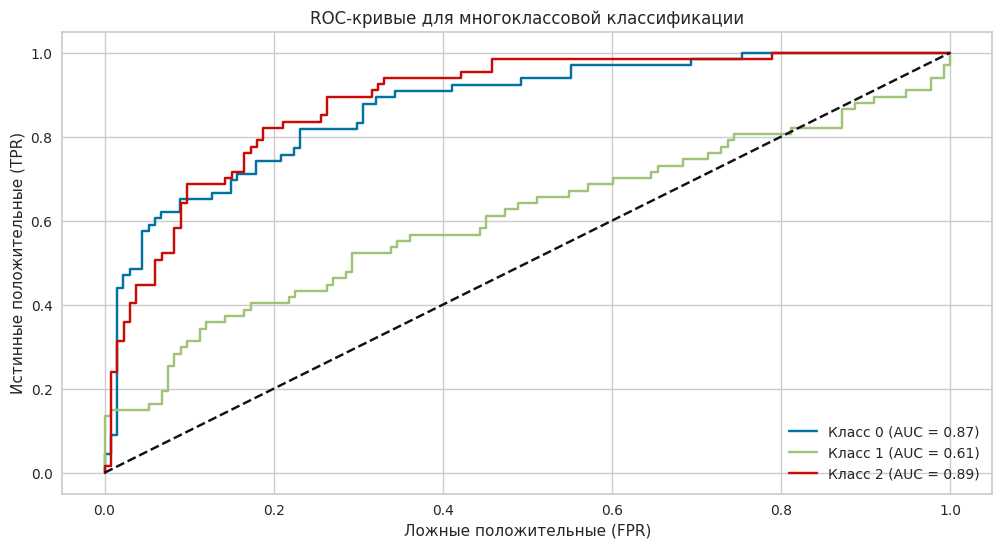

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

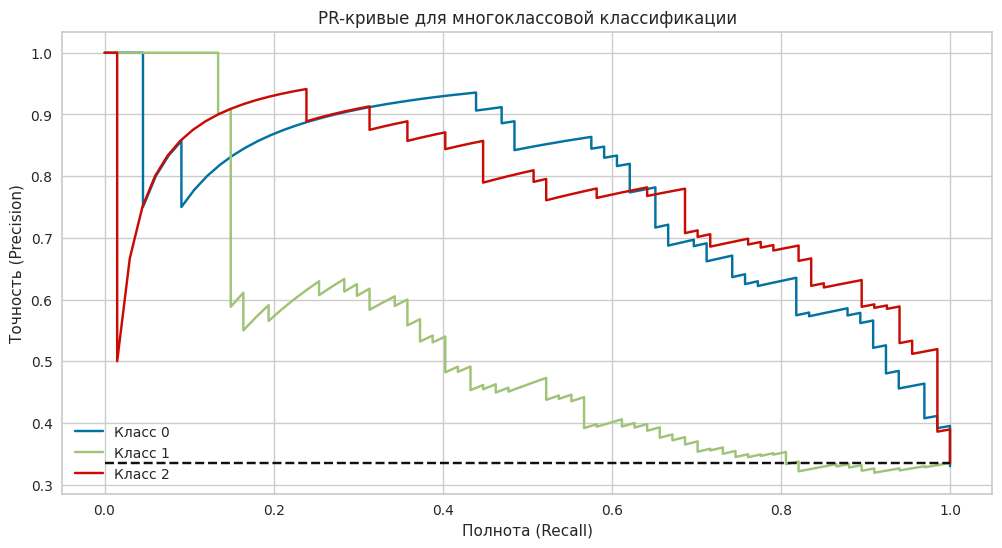

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, precision_recall_curve, roc_auc_score
from sklearn.preprocessing import label_binarize


X, y = make_classification(n_samples=1000, n_classes=3, n_informative=3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


model = LogisticRegression(multi_class='ovr', solver='liblinear')
model.fit(X_train, y_train)


y_proba = model.predict_proba(X_test)


y_test_bin = label_binarize(y_test, classes=[0, 1, 2])


plt.figure(figsize=(12, 6))


for i in range(3):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Класс {i} (AUC = {roc_auc:.2f})')


plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Ложные положительные (FPR)')
plt.ylabel('Истинные положительные (TPR)')
plt.title('ROC-кривые для многоклассовой классификации')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 6))

for i in range(3):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_proba[:, i])
    plt.plot(recall, precision, label=f'Класс {i}')

no_skill = len(y_test[y_test == 1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], 'k--')
plt.xlabel('Полнота (Recall)')
plt.ylabel('Точность (Precision)')
plt.title('PR-кривые для многоклассовой классификации')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


Модель плохо справляется с определением 1 класса, и приемлемо для двух других классов

In [63]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.76      0.70        66
           1       0.54      0.31      0.40        67
           2       0.65      0.82      0.72        67

    accuracy                           0.63       200
   macro avg       0.61      0.63      0.61       200
weighted avg       0.61      0.63      0.61       200



### 6. Используйте для построения кривых библиотеку yellowbrick.

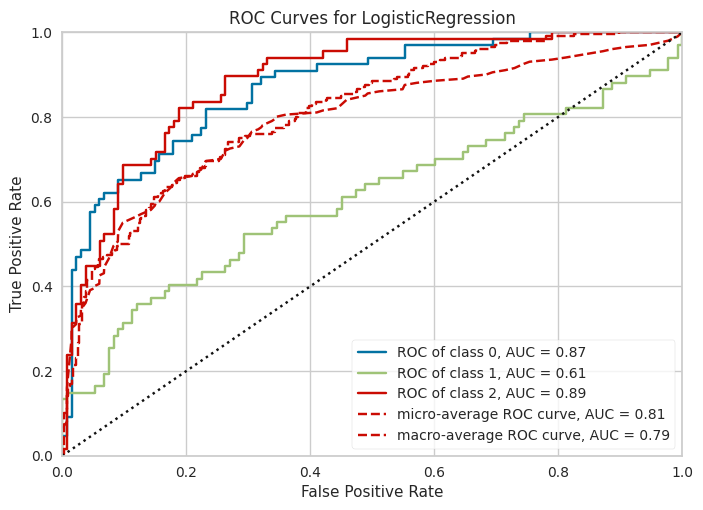

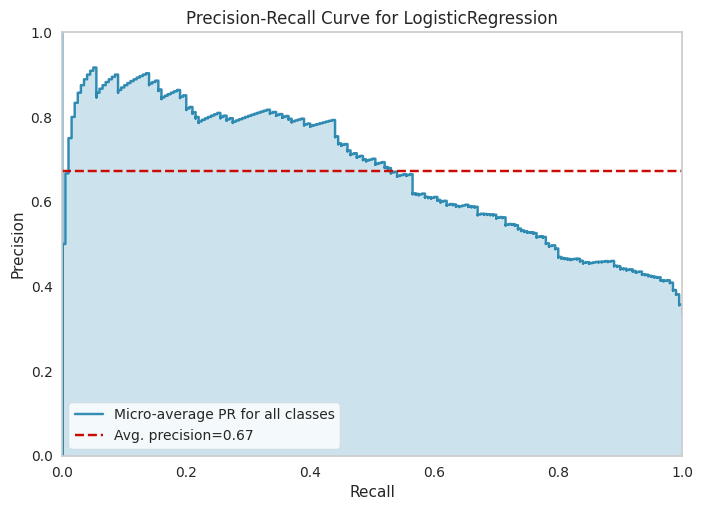

<Axes: title={'center': 'Precision-Recall Curve for LogisticRegression'}, xlabel='Recall', ylabel='Precision'>

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize
from yellowbrick.classifier import ROCAUC, PrecisionRecallCurve

plt.rcParams['font.family'] = 'DejaVu Sans'

X, y = make_classification(n_samples=1000, n_classes=3, n_informative=3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


model = LogisticRegression(multi_class='ovr', solver='liblinear')
model.fit(X_train, y_train)


y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Визуализация ROC-кривых с помощью Yellowbrick
roc_viz = ROCAUC(model, classes=[0, 1, 2])
roc_viz.fit(X_train, y_train)
roc_viz.score(X_test, y_test)
roc_viz.show()

# Визуализация PR-кривых с помощью Yellowbrick
pr_viz = PrecisionRecallCurve(model)
pr_viz.fit(X_train, y_train)
pr_viz.score(X_test, y_test)
pr_viz.show()


# Контрольные вопросы

1. **Какие модели можно оценивать с помощью классификационных кривых (ROC и PR) и почему именно их?**  
   Классификационные кривые (ROC и PR) можно использовать для оценки моделей бинарной классификации, так как они оценивают поведение модели при разных порогах классификации. Для задач многоклассовой классификации используются их расширенные версии, такие как ROC для каждого класса или PR для каждого класса по отдельности.

2. **В каких случаях лучше использовать PR-кривую, а в каких - ROC и почему?**  
   PR-кривая предпочтительнее для сильно несбалансированных данных, так как фокусируется на меньшем классе, в отличие от ROC-кривой, которая может быть завышена при большом числе отрицательных примеров. ROC-кривая лучше подходит для сбалансированных классов.

3. **Какие виды усреднения вы знаете (micro, macro) и в чем особенности их применения?**  
   Micro усреднение учитывает все классы в одной метрике, применяя их ко всем примерам; Macro усреднение учитывает каждый класс отдельно и усредняет метрики по всем классам. Micro используется для оценки общей производительности, а Macro для оценки перфоманса каждого класса.

4. **Как вычисляются метрики для построения кривых в задачах множественной классификации?**  
   В многоклассовой классификации метрики для построения кривых рассчитываются для каждого класса отдельно, а затем усредняются по всем классам, обычно используя метод "One-vs-Rest".

5. **Почему при построении кривых с помощью yellowbrick на графике отображаются сразу несколько кривых и что они значат?**  
   Когда используется yellowbrick для построения кривых, отображаются кривые для каждого класса по отдельности. Это позволяет визуализировать, как хорошо модель работает для каждого класса и выявить, какие классы могут быть классифицированы хуже.
